# Guidestar Targets Example

Some programs uses multiple guidestar targets for a given observation. We can observe the technical functions of the JWST when FGS locks on to a guidestar and switches to the next using Spelunker. For this example, we will be exploring Program ID 2079.

In [8]:
import sys
sys.path.append('/Users/ddeal/JWST-FGS-Spelunker/JWST-FGS-Spelunker-main/')

import Spelunker

spk = Spelunker.load('/Users/ddeal/JWST-Treasure-Chest/', pid=1534)

2023-07-19 10:26:24,770 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340000825_cal.fits with expected size 9388800.
2023-07-19 10:26:24,834 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340002102_cal.fits with expected size 7827840.
2023-07-19 10:26:24,906 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534001002_03101_00001_guider1/jw01534001002_gs-fg_2022340003651_cal.fits with expected size 8772480.


INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340000825_cal.fits with expected size 9388800. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001001_03101_00001_guider1/jw01534001001_gs-fg_2022340002102_cal.fits with expected size 7827840. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001002_03101_00001_guider1/jw01534001002_gs-fg_2022340003651_cal.fits with expected size 8772480. [astroquery.query]


2023-07-19 10:26:24,973 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534001003_03101_00001_guider1/jw01534001003_gs-fg_2022340005224_cal.fits with expected size 8772480.
2023-07-19 10:26:25,044 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534001004_03101_00001_guider1/jw01534001004_gs-fg_2022340010755_cal.fits with expected size 8766720.
2023-07-19 10:26:25,114 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534002001_05101_00001_guider2/jw01534002001_gs-fg_2022338014704_cal.fits with expected size 10941120.


INFO: Found cached file ./mastDownload/JWST/jw01534001003_03101_00001_guider1/jw01534001003_gs-fg_2022340005224_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534001004_03101_00001_guider1/jw01534001004_gs-fg_2022340010755_cal.fits with expected size 8766720. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534002001_05101_00001_guider2/jw01534002001_gs-fg_2022338014704_cal.fits with expected size 10941120. [astroquery.query]


2023-07-19 10:26:25,178 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534002001_05101_00001_guider2/jw01534002001_gs-fg_2022338015941_cal.fits with expected size 7830720.
2023-07-19 10:26:25,243 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534002002_04101_00001_guider2/jw01534002002_gs-fg_2022338021919_cal.fits with expected size 10428480.
2023-07-19 10:26:25,303 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534002003_03101_00001_guider2/jw01534002003_gs-fg_2022338023521_cal.fits with expected size 8772480.
2023-07-19 10:26:25,368 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534002004_03101_00001_guider2/jw01534002004_gs-fg_2022338025056_cal.fits with expected size 8769600.


INFO: Found cached file ./mastDownload/JWST/jw01534002001_05101_00001_guider2/jw01534002001_gs-fg_2022338015941_cal.fits with expected size 7830720. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534002002_04101_00001_guider2/jw01534002002_gs-fg_2022338021919_cal.fits with expected size 10428480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534002003_03101_00001_guider2/jw01534002003_gs-fg_2022338023521_cal.fits with expected size 8772480. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534002004_03101_00001_guider2/jw01534002004_gs-fg_2022338025056_cal.fits with expected size 8769600. [astroquery.query]


2023-07-19 10:26:25,443 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534003001_03101_00001_guider1/jw01534003001_gs-fg_2023125174543_cal.fits with expected size 9809280.
2023-07-19 10:26:25,510 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534003001_03101_00001_guider1/jw01534003001_gs-fg_2023125175812_cal.fits with expected size 7793280.
2023-07-19 10:26:25,575 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534003002_02101_00001_guider1/jw01534003002_gs-fg_2023125181351_cal.fits with expected size 8337600.


INFO: Found cached file ./mastDownload/JWST/jw01534003001_03101_00001_guider1/jw01534003001_gs-fg_2023125174543_cal.fits with expected size 9809280. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534003001_03101_00001_guider1/jw01534003001_gs-fg_2023125175812_cal.fits with expected size 7793280. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534003002_02101_00001_guider1/jw01534003002_gs-fg_2023125181351_cal.fits with expected size 8337600. [astroquery.query]


2023-07-19 10:26:25,656 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534003003_02101_00001_guider1/jw01534003003_gs-fg_2023125182911_cal.fits with expected size 8337600.
2023-07-19 10:26:25,721 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534003004_02101_00001_guider1/jw01534003004_gs-fg_2023125185519_cal.fits with expected size 8337600.
2023-07-19 10:26:25,777 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534004001_03101_00001_guider2/jw01534004001_gs-fg_2023123203053_cal.fits with expected size 12974400.
2023-07-19 10:26:25,836 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534004001_03101_00001_guider2/jw01534004001_gs-fg_2023123204330_cal.fits with expected size 7827840.


INFO: Found cached file ./mastDownload/JWST/jw01534003003_02101_00001_guider1/jw01534003003_gs-fg_2023125182911_cal.fits with expected size 8337600. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534003004_02101_00001_guider1/jw01534003004_gs-fg_2023125185519_cal.fits with expected size 8337600. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534004001_03101_00001_guider2/jw01534004001_gs-fg_2023123203053_cal.fits with expected size 12974400. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534004001_03101_00001_guider2/jw01534004001_gs-fg_2023123204330_cal.fits with expected size 7827840. [astroquery.query]


2023-07-19 10:26:25,895 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534004002_03101_00001_guider2/jw01534004002_gs-fg_2023123210335_cal.fits with expected size 8766720.
2023-07-19 10:26:26,018 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534004003_03101_00001_guider2/jw01534004003_gs-fg_2023123211905_cal.fits with expected size 8766720.
2023-07-19 10:26:26,079 - stpipe - INFO - Found cached file ./mastDownload/JWST/jw01534004004_03101_00001_guider2/jw01534004004_gs-fg_2023123213436_cal.fits with expected size 8769600.


INFO: Found cached file ./mastDownload/JWST/jw01534004002_03101_00001_guider2/jw01534004002_gs-fg_2023123210335_cal.fits with expected size 8766720. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534004003_03101_00001_guider2/jw01534004003_gs-fg_2023123211905_cal.fits with expected size 8766720. [astroquery.query]
INFO: Found cached file ./mastDownload/JWST/jw01534004004_03101_00001_guider2/jw01534004004_gs-fg_2023123213436_cal.fits with expected size 8769600. [astroquery.query]


<WCSAxes: title={'center': 'Guidestar positions — 1534'}>

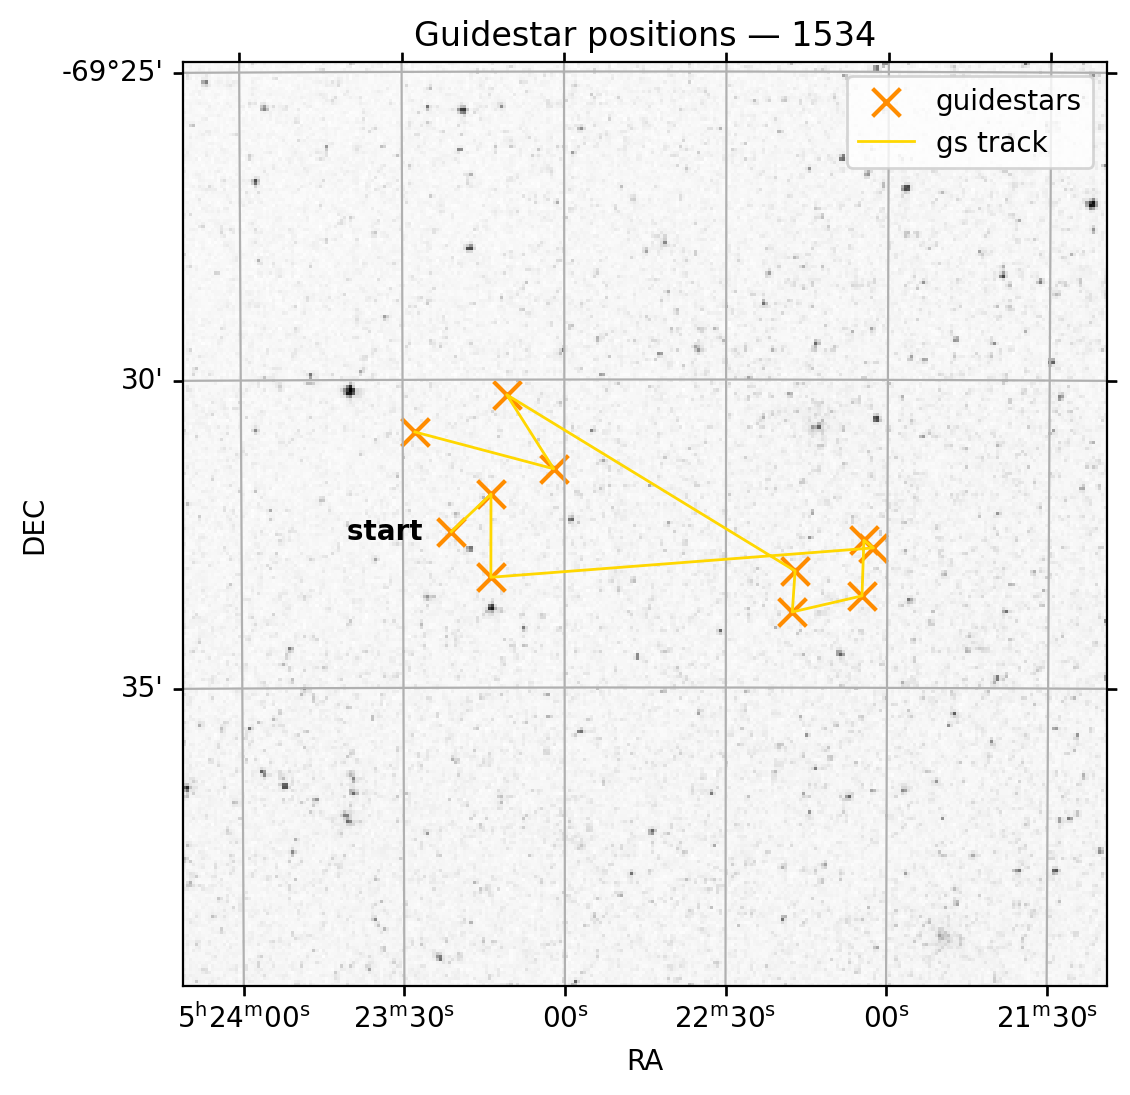

In [9]:
spk.guidestar_plot()

In [10]:
spk.object_properties

,guidestar_catalog_id,gaiadr1ID,gaiadr1ID,int_start,int_stop,ra,dec,Jmag,Hmag
0,S1HP079555,4658077781377287680,4658077781376437888,59917.066396,59917.074354,80.837584,-69.541124,13.659,12.898
1,S1HP080554,4658077991763987712,4658077991799023616,59917.089163,59917.096759,80.806837,-69.530972,15.001,14.282
2,S1HP078573,4657983910572904320,4657983910572904320,59917.112547,59917.118705,80.807043,-69.553474,13.839,13.078
3,S1HP079590,4657986831103727872,4657986835382982016,59918.999015,59919.005848,80.510790,-69.545479,15.410,14.839
4,S1HP079769,4657986831078120832,4657986835433225728,59919.019436,59919.025598,80.518235,-69.543415,15.231,14.341
5,S1HP078292,4657986796681532672,4657986801073794432,59919.041018,59919.047165,80.519564,-69.558464,12.804,11.883
6,S1HP077850,4657986762384054144,4657986766713867264,60067.871344,60067.877490,80.573531,-69.562862,12.957,12.227
7,S1HP197501,4657986865463528832,4657986869793061376,60067.882117,60067.888264,80.571447,-69.551750,13.063,12.168
8,S1HP773376,,4658078124973829632,60069.733171,60069.740086,80.794522,-69.504084,13.426,12.654
9,S1HP081366,4658078056254368128,4658078056254368128,60069.753592,60069.759620,80.758291,-69.524143,12.765,11.899


In [11]:
ra = spk.object_properties['ra']
dec = spk.object_properties['dec']

[0.1500164810743348, 0.11953046593592308, 0.12032537370850632, 0.17690778283757677, 0.16940162100623196, 0.16913216910676443, 0.1165043470147488, 0.11682384232245689, 0.11252095397276328, 0.0722701386881352, 0.1797156038673135]
80.68758156500114 -69.53907955576621


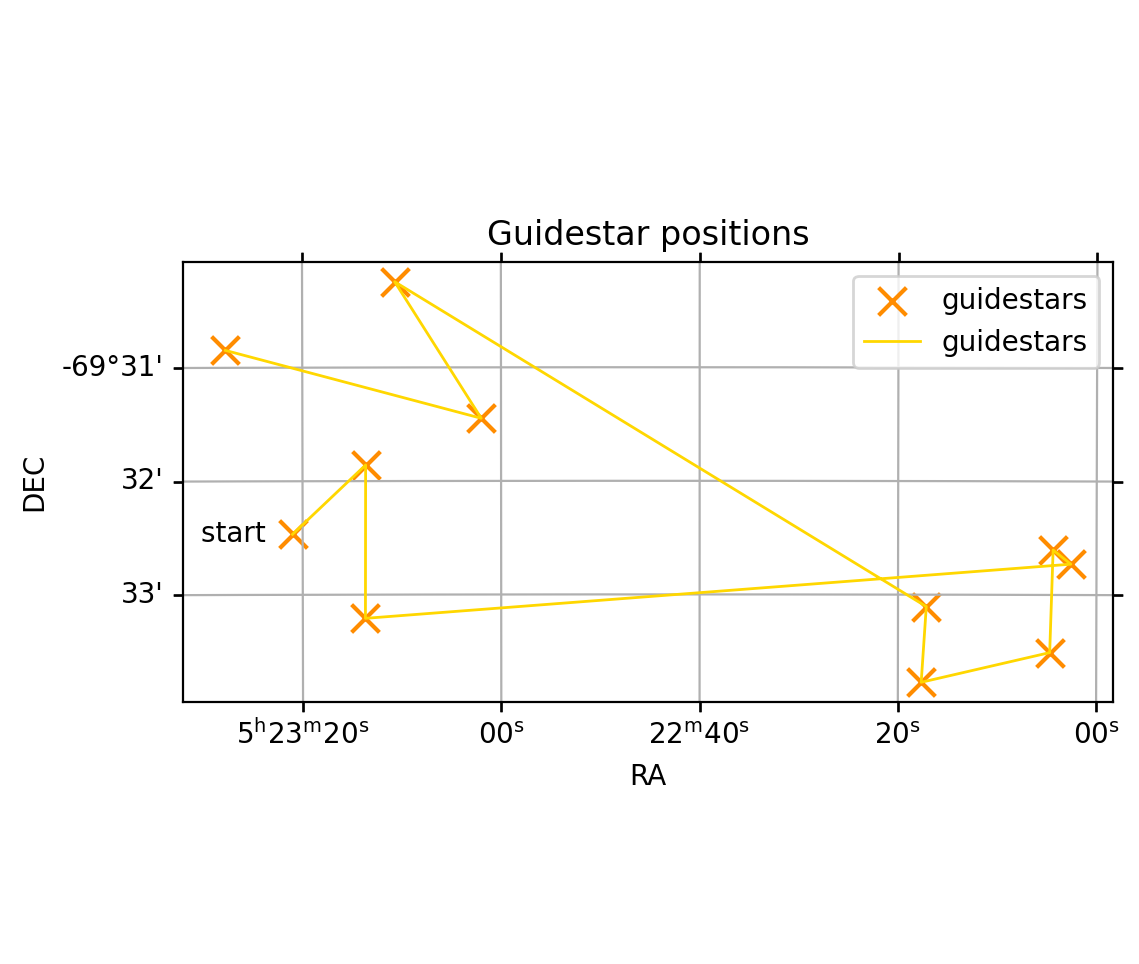

In [29]:
from astroplan.plots import plot_finder_image
from astropy import coordinates
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy import units as u
from astroquery.skyview import SkyView
from astropy.wcs import WCS
from astroplan import FixedTarget
import numpy as np


coords = SkyCoord(ra, dec, unit='deg')
target = SkyCoord(np.mean(coords.ra),np.mean(coords.dec),unit='deg')

distance = []
for coord in coords:
    distance.append(np.sqrt(  (target.ra.value - coord.ra.value)**2
                        + (target.dec.value - coord.dec.value)**2  ))
print(distance)
fov_radius = np.mean(distance)*u.deg + 3*np.std(distance)*u.deg
fov_radius = 4 * u.deg if fov_radius > 4 * u.deg else fov_radius
print(target.ra.value, target.dec.value)



fig, ax1 = plt.subplots(figsize=(6,6),dpi=200)

ax, hdu = plot_finder_image(target, survey='DSS', fov_radius=fov_radius,)
ax1.set_axis_off()
ax.scatter(coords.ra, coords.dec,  color='darkorange', marker='x', s=100, linewidth=1.5, transform=ax.get_transform('fk5'), label='guidestars')
ax.plot(coords.ra, coords.dec,  color='gold', linewidth=1, transform=ax.get_transform('fk5'), label='guidestars')
ax.text(coords.ra[0].value, coords.dec[0].value, s='start   ', horizontalalignment='right' , verticalalignment='center', transform=ax.get_transform('fk5'),)

ax.set_title("Guidestar positions")
ax.legend()

In [45]:
import numpy as np 
np.mean(coords.ra)

np.mean(coords.dec)

<Latitude -69.53907956 deg>

In [103]:
coords.ra[0].value

80.8375841177552

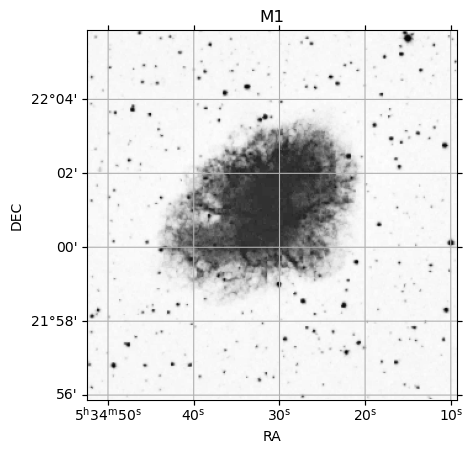

In [5]:
from astroplan.plots import plot_finder_image
from astroplan import FixedTarget
import matplotlib.pyplot as plt

messier1 = FixedTarget.from_name("M1")
ax, hdu = plot_finder_image(messier1)
plt.show()

[60067.842891134256, 60067.863785925925, 60067.86755480324, 60067.8679340625, 60067.86876369213, 60067.877617025464, 60067.88137405093, 60067.88839034722, 60067.89216811342, 60067.89915181713]


(60067.84, 60067.9)

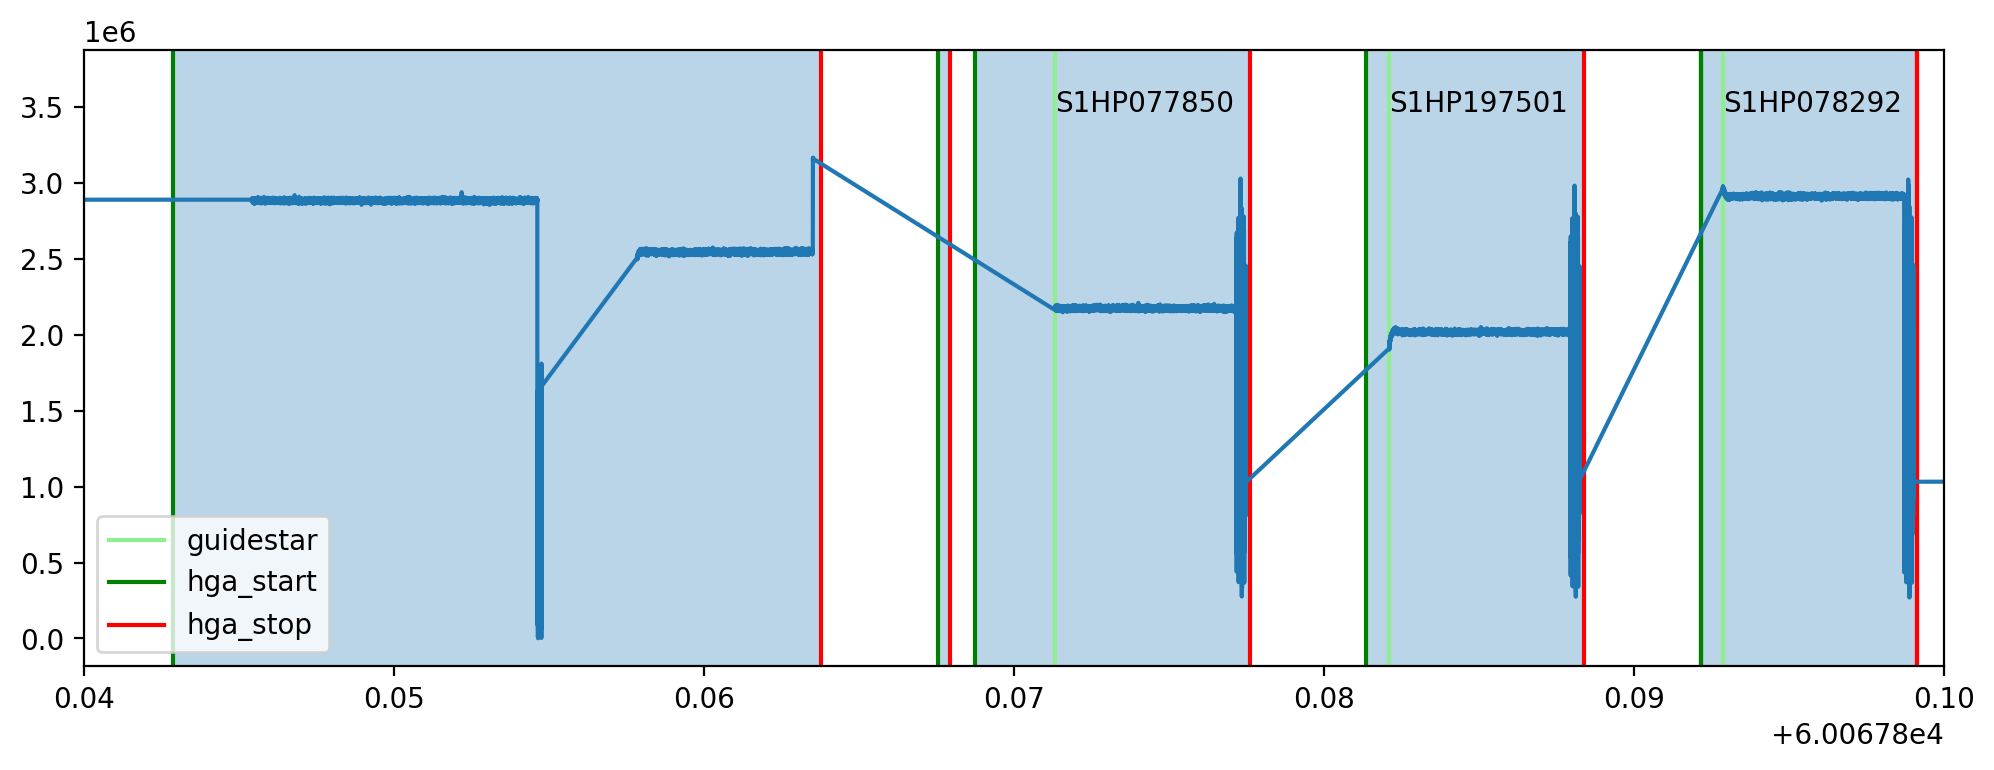

In [6]:
spk.mast_api_token = '8eedd0a371a44e598a9c4489e3148811'

fig, ax = plt.subplots(figsize=(12,4),dpi=200)
#ax = spk.mnemonics_local('FILENAME')
ax = spk.mnemonics_local('GUIDESTAR')
ax = spk.mnemonics('SA_ZHGAUPST', 60067.84, 60067.9)

ax.plot(spk.fg_time, spk.fg_flux)
plt.legend(loc=3)

plt.xlim(60067.84, 60067.9)


(60067.84, 60067.9)

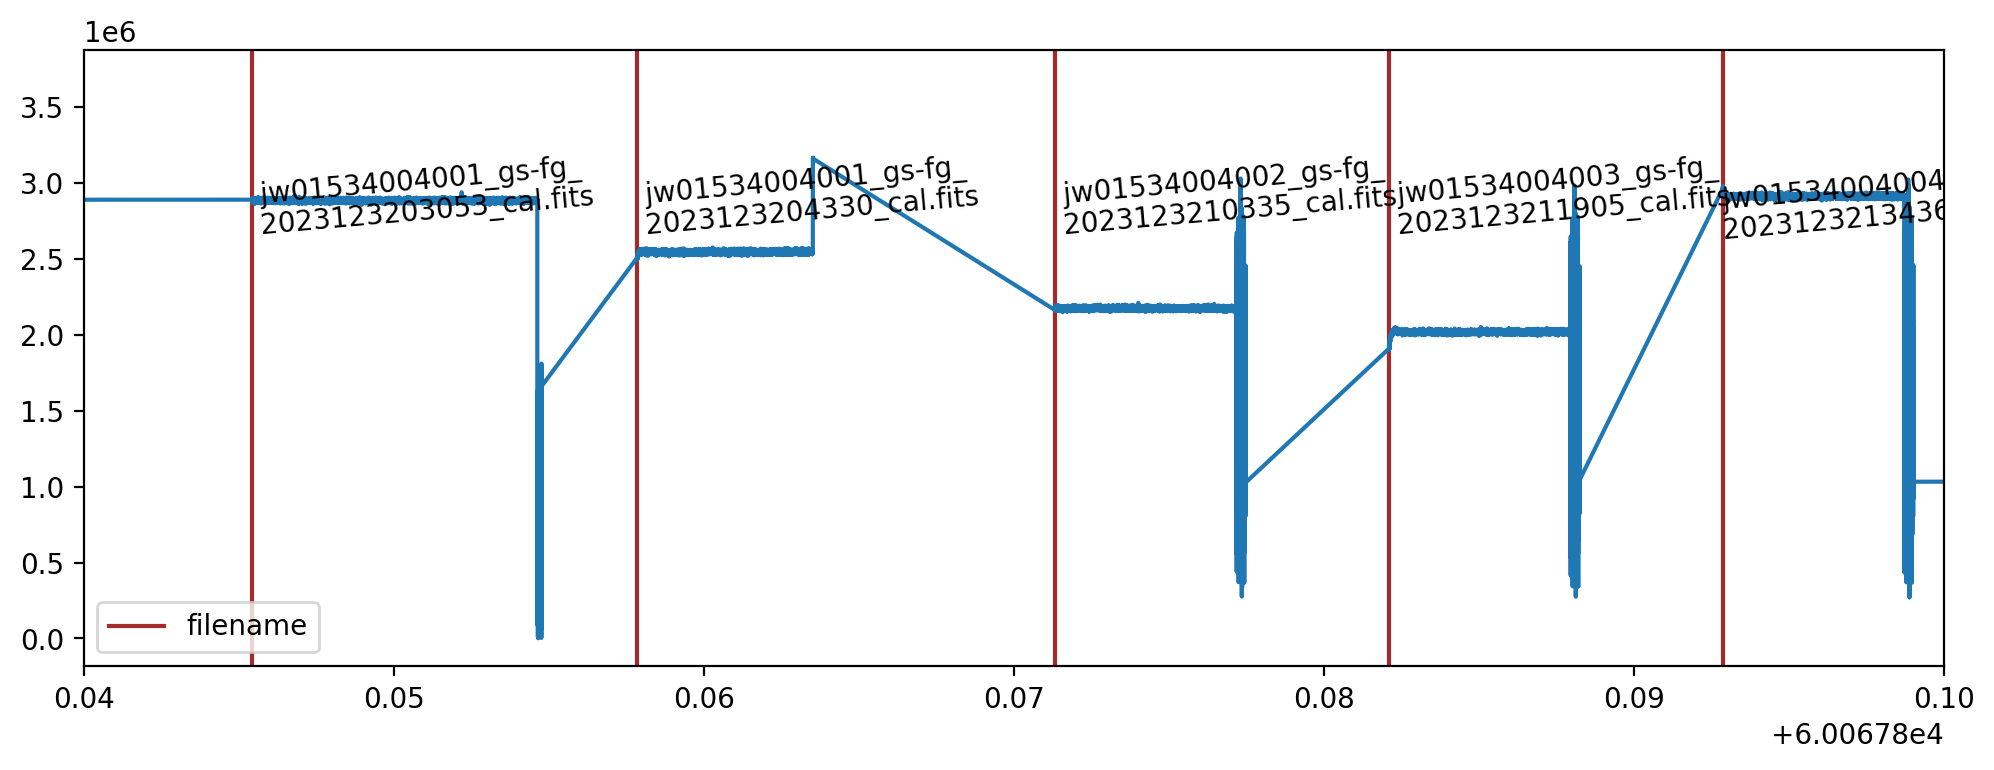

In [19]:
spk.mast_api_token = '8eedd0a371a44e598a9c4489e3148811'

fig, ax = plt.subplots(figsize=(12,4),dpi=200)
ax = spk.mnemonics_local('FILENAME')
#ax = spk.mnemonics_local('GUIDESTAR')
#ax = spk.mnemonics('SA_ZHGAUPST', 60067.84, 60067.9)

ax.plot(spk.fg_time, spk.fg_flux)
plt.legend(loc=3)

plt.xlim(60067.84, 60067.9)